# PRUEBA 3 - ANÁLISIS EXPLORATORIO - HOMICIDE REPORT, 1980 - 2014

The Murder Accountability Project is the most complete database of homicides in the United States currently available. This dataset includes murders from the FBI's Supplementary Homicide Report from 1976 to the present and Freedom of Information Act data on more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and weapon used.

Data source: https://www.kaggle.com/murderaccountability/homicide-reports/

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import linregress

%matplotlib inline

## DATASET OVERVIEW

In [4]:
hdataset = pd.read_csv("database.csv")

C:\Users\Usuario\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
hdataset.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [4]:
hdataset.tail()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI
638453,638454,WY01902,Rock Springs,Municipal Police,Sweetwater,Wyoming,2014,September,1,Murder or Manslaughter,...,Not Hispanic,Female,24,White,Not Hispanic,Daughter,Blunt Object,0,1,FBI


In [5]:
print "Nº de filas:", hdataset.shape[0]
print "Nº de columnas:", hdataset.shape[1]

Nº de filas: 638454
Nº de columnas: 24


In [6]:
hdataset.columns.values

array(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'], dtype=object)

In [7]:
hdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null object
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    6384

In [8]:
hdataset.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [9]:
hdataset.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

### CONCLUSIONES

1. ¿Qué significa la columna 'Incident'? ¿La necesitamos?
2. 'Perpetrator Age' no es de tipo entero. Vamos a convertirla.
3. 'Victim Count' y 'Perpetrator Count' indican si hubo vícimas o criminales adicionales respectivamente. Vamos a transformarla para que exprese el valor total para cada caso (sumándole 1).
4. Las columnas 'Record ID', 'Agency Code' y 'Agency Name' no vamos a necesitarlas. Las eliminaremos.
5. La columna 'Victim Age' parece tener outliers. Habrá que eliminarlos y estudiar también si hay outliers en 'Perpetrator Age', una vez que la hayamos transformado.

## DATASET TRANSFORMATION

### COLUMNA 'INCIDENT'

In [10]:
hdataset['Incident'].unique()

array([  1,   2,   3,   4,  41,   5,   6,   7,   8,   9,  10,  11,  33,
        12,  17,  13,  14,  15,  16,  18,  21,  19,  20,  22,  23,  60,
        28,  59,  29,  24,  66,  54,  49,  77,  40,  82,  37,  86,  31,
        53,  90,  25,  26,  27,  30,  32,  34,  35,  36,  38,  39,  42,
        43,  44,  45,  46,  47,  48,  50,  51,  52,  55,  56,  57,  58,
        61,  62,  63,  64,  65,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  78,  79,  80,  81,  83,  84,  85,  87,  88,  89,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 137, 126, 134, 151, 125, 205, 124,
       127, 128, 129, 130, 131, 132, 133, 135, 136, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

La columna **'Incident'** no dice nada sólo viendo sus valores. Parece un orden secuencial, pero, ¿de qué? Viendo el dataset podría deducirse que es el nº de suceso acontecido en un mismo mes para una misma agencia...

In [11]:
by_agency = hdataset.groupby('Agency Name')['Record ID'].count()
hdataset[hdataset['Agency Name'] == by_agency.argmax()].sort_values(by = ['Year', 'Month', 'Incident'])

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
14945,14946,NY03030,New York,Municipal Police,New York,New York,1980,April,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Blunt Object,0,0,FBI
14946,14947,NY03030,New York,Municipal Police,New York,New York,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Blunt Object,0,0,FBI
14947,14948,NY03030,New York,Municipal Police,New York,New York,1980,April,3,Murder or Manslaughter,...,Unknown,Female,18,Unknown,Unknown,Son,Blunt Object,0,0,FBI
14948,14949,NY03030,New York,Municipal Police,New York,New York,1980,April,4,Murder or Manslaughter,...,Unknown,Male,25,Unknown,Unknown,Stranger,Handgun,0,1,FBI
14949,14950,NY03030,New York,Municipal Police,New York,New York,1980,April,5,Murder or Manslaughter,...,Unknown,Male,20,Unknown,Unknown,Stranger,Handgun,0,0,FBI
14950,14951,NY03030,New York,Municipal Police,New York,New York,1980,April,6,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
14951,14952,NY03030,New York,Municipal Police,New York,New York,1980,April,7,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Blunt Object,0,0,FBI
14952,14953,NY03030,New York,Municipal Police,New York,New York,1980,April,8,Murder or Manslaughter,...,Unknown,Male,54,Unknown,Unknown,Stranger,Handgun,0,0,FBI
14953,14954,NY03030,New York,Municipal Police,New York,New York,1980,April,9,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Knife,0,0,FBI
14954,14955,NY03030,New York,Municipal Police,New York,New York,1980,April,10,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI


Parece que estamos en los cierto. Aun así, no nos ayuda a clasificar los casos por día del mes en que han sucedido y no parece una columna imprescindible para este estudio...Vamos a eliminarla, justo a las otras columnas que hemos comentado.

In [12]:
hdataset.drop(hdataset.columns[[0, 1, 2, 3, 4, 8, 14, 18]], axis=1, inplace=True)

In [13]:
hdataset.head()

,State,Year,Month,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,Alaska,1980,January,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0,0,FBI
1,Alaska,1980,March,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0,FBI
2,Alaska,1980,March,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,0,FBI
3,Alaska,1980,April,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0,FBI
4,Alaska,1980,April,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,1,FBI


### COLUMNAS 'VICTIM AGE' Y 'PERPETRATOR AGE'

Convertimos 'Perpetrator Age' a valor numérico.

In [14]:
hdataset['Perpetrator Age'] = pd.to_numeric(hdataset['Perpetrator Age'], errors = 'coerce')

In [15]:
hdataset[hdataset['Perpetrator Age'].isnull() == True]

,State,Year,Month,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
634666,Oklahoma,2014,June,Murder or Manslaughter,No,Male,46,Black,Unknown,NaN,Unknown,Unknown,Handgun,0,0,FBI


Coincide con un criminal del que se desconocen sus datos...En este dataset, el valor 0 es el asignado para codificar la edad del sujeto criminal cuando es desconocido, por lo que vamos a asignar a este valor nulo el valor 0.

In [16]:
hdataset.ix[634666, 'Perpetrator Age'] = 0
hdataset['Perpetrator Age'] = hdataset['Perpetrator Age'].astype(int)

Los valores 998 y 0 respectivamente, son los que se han utilizado para codificar la edad cuando la víctima o el sujeto son desconocidos. Calculemos cuántos son, quizás podemos eliminarlos.

In [17]:
unknown_victims = (hdataset['Victim Age'] == 998).sum()
print "Nº de victimas desconocidas:", unknown_victims

Nº de victimas desconocidas: 974


El número de víctimas desconocidas no es muy elevado. Vamos a eliminarlo.

In [18]:
hdataset = hdataset[hdataset['Victim Age'] != 998]

In [19]:
unknown_perpetrators = (hdataset['Perpetrator Age'] == 0).sum()
print "Nº de sujetos desconocidas:", unknown_perpetrators

Nº de sujetos desconocidas: 215688


Es un número bastante elevado. Podemos eliminarlo o sustituirlo por la mediana de 'Perpetrator Age' o dejarlo como está. Por ahora, lo dejaremos como está.

### COLUMNAS 'VICTIM COUNT' Y 'PERPETRATOR COUNT'

Como comentamos anteriormente, las modificamos para que representen el número total de víctimas y sujetos.

In [20]:
hdataset['Victim Count'] = hdataset['Victim Count'].apply(lambda x: x + 1)
hdataset['Perpetrator Count'] = hdataset['Perpetrator Count'].apply(lambda x: x + 1)
hdataset.head()

,State,Year,Month,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,Alaska,1980,January,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,1,1,FBI
1,Alaska,1980,March,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,1,1,FBI
2,Alaska,1980,March,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,1,1,FBI
3,Alaska,1980,April,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,1,1,FBI
4,Alaska,1980,April,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,1,2,FBI


Ya tenemos el dataset final.

## EVOLUCIÓN DEL NÚMERO DE CRÍMENES POR AÑO

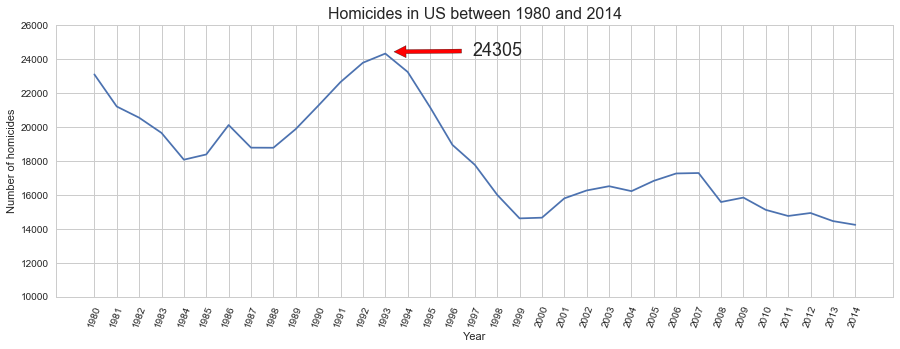

In [21]:
crimes_by_year = hdataset.groupby('Year')['Victim Count'].count()
with sns.axes_style("whitegrid"):
    fig = plt.figure(figsize = (15,5))
    ax = fig.add_subplot(111)
    plt.plot(crimes_by_year)
    ax.set_xticks(range(1980,2015,1))
    ax.set_ylim(10000,26000)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of homicides')
    label = crimes_by_year.max()
    worst_year = crimes_by_year.argmax()
    ax.annotate(label, xy = (worst_year, crimes_by_year.asof(worst_year) + 100),\
                xytext = (worst_year + 5, crimes_by_year.asof(worst_year + 5) + 9000),fontsize = 18,\
                arrowprops = dict(facecolor = 'r', shrink=0.1), horizontalalignment = 'center',\
                verticalalignment = 'top')
    plt.setp(ax.get_xticklabels(), rotation = 70)
    plt.title('Homicides in US between 1980 and 2014', fontsize = 16)

El año en el que se cometieron más homicidios fue 1993. Vemos que, hasta mediados de los 90, el número de crímenes cometidos anualmente era muy elevado (superior a 20.000). Desde mediados de los 90, el número se mantiene entre 14 y 18 mil.

## EVOLUCIÓN DEL NÚMERO DE CRÍMENES POR ESTADO

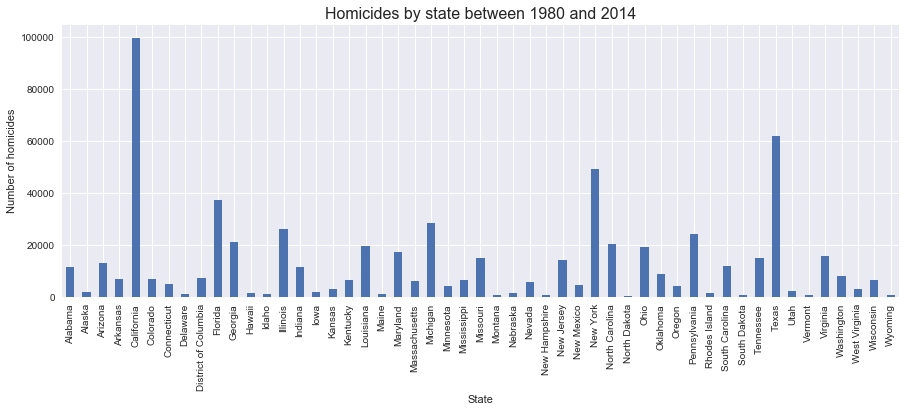

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
by_state = hdataset.groupby('State')['Victim Count'].count()
by_state.plot(kind = 'bar', figsize = (15,5), grid = True, ax = ax)
ax.set_ylabel('Number of homicides')
plt.title('Homicides by state between 1980 and 2014', fontsize = 16)

Como podría ser lógico pensar, parece que existe relación entre el número de habitantes de un estado y el número de crímenes cometidos.

Obtenermos la población de cada estado: https://en.wikipedia.org/wiki/Demography_of_the_United_States

('r-squared:', 0.94841307814074638)


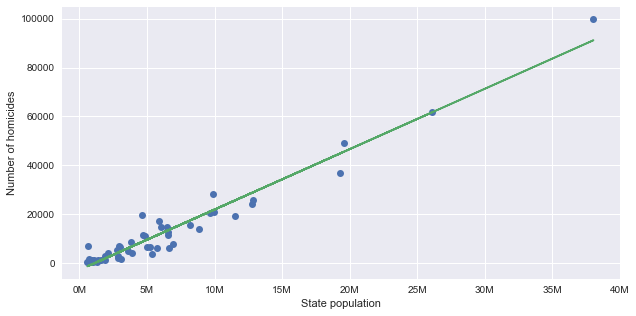

In [23]:
state_pop = [4.822, 0.731, 6.553, 2.949, 38.041, 5.187, 3.590, 0.917, 0.632, 19.312, 9.920, 1.392, 1.595,\
                   12.875, 6.537, 3.074, 2.885, 4.980, 4.601, 1.329, 5.884, 6.646, 9.883, 5.379, 2.984, 6.021, 1.005,\
                   1.855, 2.758, 1.320, 8.864, 2.085, 19.570, 9.656, 0.699, 11.544, 3.814, 3.899, 12.763, 1.050,\
                   4.723, 0.883, 6.456, 26.059, 2.855, 0.626, 8.185, 6.897, 1.855, 5.726, 0.576]
crimes_by_state = by_state.values

# Generated linear fit
x = np.array(state_pop)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, crimes_by_state)
line = slope*x+intercept
#Coefficent of determination
print("r-squared:", r_value**2)

#Plot the data along with the fitted line
fig =plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
plt.plot(x, crimes_by_state, 'o', x, line)
ax.set_xticks(range(0,45,5))
ax.set_xticklabels(['0M', '5M', '10M', '15M', '20M', '25M', '30M', '35M', '40M'])
ax.set_xlabel('State population')
ax.set_ylabel('Number of homicides')

## HOMICIDIOS EN FUNCIÓN DE LA ESTACIÓN CLIMÁTICA

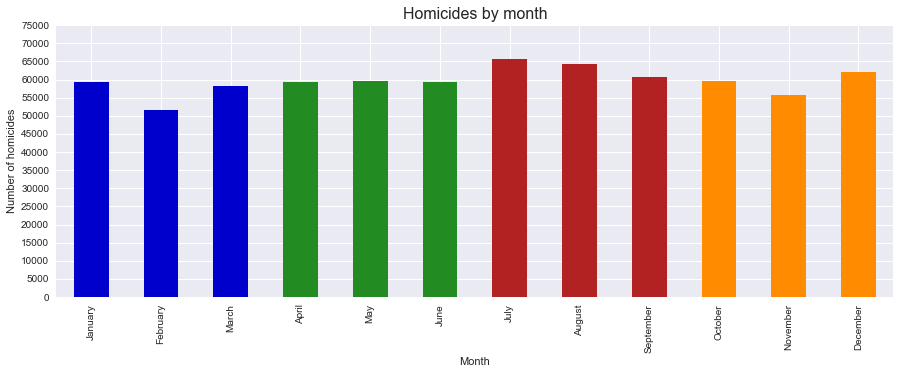

In [24]:
fig = plt.figure(figsize = (15,5))
by_month = hdataset.groupby('Month')['Victim Count'].sum()
by_month = by_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',\
                             'October', 'November', 'December'])
colors = ['#0000CD','#0000CD','#0000CD','#228B22','#228B22','#228B22','#B22222','#B22222','#B22222',\
          '#FF8C00','#FF8C00','#FF8C00']
ax = by_month.plot(kind = 'bar', color = colors)
ax.set_yticks(range(0,80000,5000))
ax.set_ylabel('Number of homicides')
plt.title('Homicides by month', fontsize = 16)

Aunque no parece significativo, en verano se comenten más crímenes que en otras estaciones.

## HOMICIDIOS EN FUNCION DE LA EDAD

### Distribuciones de frecuencia

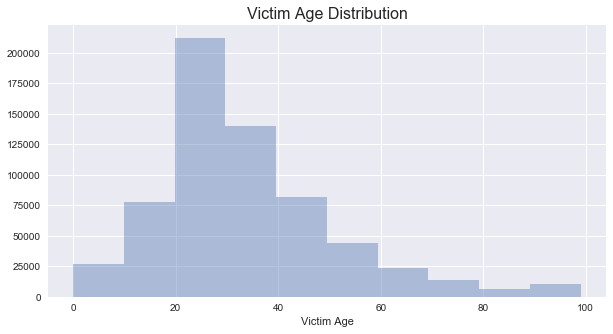

In [25]:
#De las victimas
plt.figure(figsize = (10,5))
sns.distplot(hdataset['Victim Age'], bins = 10, kde=False)
plt.title('Victim Age Distribution', fontsize = 16)

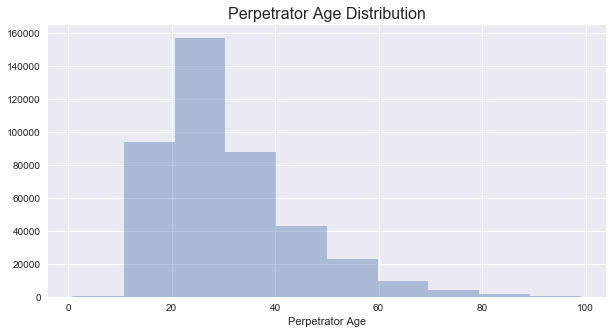

In [26]:
#De los sujetos
plt.figure(figsize = (10,5))
sns.distplot(hdataset[hdataset['Perpetrator Age'] != 0]['Perpetrator Age'], bins = 10, kde=False)
plt.title('Perpetrator Age Distribution', fontsize = 16)

Como parece lógico pensar, entre 0 y 10 años hay más víctimas que criminales, mientras que, para el resto de las franjas de edad, las frecuencias están más igualadas. Es llamativo, en cualquier caso, el elevado número de adolescentes que cometen crímenes. Incluso hay más criminales que víctimas en esta franja de edad.

### Nos preguntamos, si los crímenes que se cometen durante la infancia son en su mayoría por accidente.

In [27]:
#Creamos una funcion para obtener la etapa del desarrollo en función de la edad numérica
def ageSpan(age):
    if (age == 0):
        return 'Unknown'
    elif ((age > 0) and(age < 11)):
        return 'Childhood'
    elif ((age >= 11) and (age < 21)):
        return 'Teenage'
    elif ((age >= 21) and (age < 60)):
        return 'Adulthood'
    else:
        return 'Old age'

In [28]:
#Creamos una columna nueva para codificar la etapa del desarrollo en la que se encuentra el sujeto
hdataset['Perpetrator Age Span'] = hdataset['Perpetrator Age'].apply(lambda x: ageSpan(x))

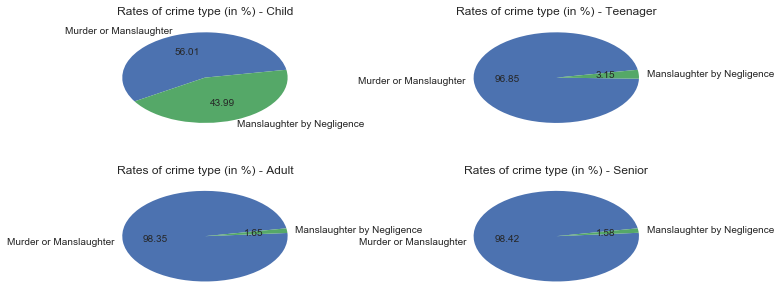

In [29]:
#Por cada etapa del desarrollo, calculamos la tasa (en %) de crímenes cometidos por imprudencia vs lo que no lo son. 
fig = plt.figure(figsize = (10,5))

#Infancia
ax1 = fig.add_subplot(221)
hchildhood = pd.DataFrame(hdataset[hdataset['Perpetrator Age Span'] == 'Childhood'], columns = ['Crime Type']) 
hc_crime_type = hchildhood.stack().value_counts()
hc_crime_type.plot(kind = 'pie', title = 'Rates of crime type (in %) - Child', startangle = 10,\
                    autopct='%.2f', ax = ax1)
ax1.set_ylabel('')

#Adolescencia
ax2 = fig.add_subplot(222)
hteenage = pd.DataFrame(hdataset[hdataset['Perpetrator Age Span'] == 'Teenage'], columns = ['Crime Type']) 
ht_crime_type = hteenage.stack().value_counts()
ht_crime_type.plot(kind = 'pie', title = 'Rates of crime type (in %) - Teenager', startangle = 10,\
                       autopct='%.2f', ax = ax2)
ax2.set_ylabel('')

#Edad adulta
ax3 = fig.add_subplot(223)
hadulthood = pd.DataFrame(hdataset[hdataset['Perpetrator Age Span'] == 'Adulthood'], columns = ['Crime Type']) 
ha_crime_type = hadulthood.stack().value_counts()
ha_crime_type.plot(kind = 'pie', title = 'Rates of crime type (in %) - Adult', startangle = 10,\
                       autopct='%.2f', ax = ax3)
ax3.set_ylabel('')

#Vejez
ax4 = fig.add_subplot(224)
holdage = pd.DataFrame(hdataset[hdataset['Perpetrator Age Span'] == 'Old age'], columns = ['Crime Type']) 
ho_crime_type = holdage.stack().value_counts()
ho_crime_type.plot(kind = 'pie', title = 'Rates of crime type (in %) - Senior', startangle = 10,\
                       autopct='%.2f', ax = ax4)
ax4.set_ylabel('')

plt.subplots_adjust(wspace = 0.7, hspace = 0.4)

Como pensábamos, la proporción de homicidios por imprudencia es mucho más alta cuando el sujeto es un niño. Sin embargo, no llega ni al 50%...Veamos edad por edad en la etapa infantil...

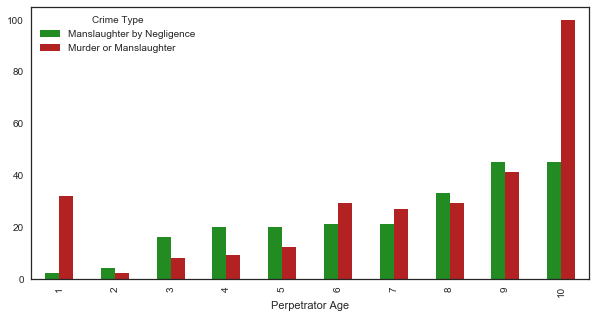

In [30]:
temp = hdataset[hdataset['Perpetrator Age Span'] == 'Childhood']
temp1 = pd.crosstab(temp['Perpetrator Age'], temp['Crime Type'])
colors = ['#228B22', '#B22222']
with sns.axes_style('white'):
    temp1.plot(kind='bar', stacked=False, figsize = (10,5), color = colors)

Los resultados apuntan a que se pueden haber cometido errores a la hora de insertar los datos, o en la investigación misma...

## ESTUDIO DEL GÉNERO

Victim Sex
Female     173211
Male       542564
Unknown       308
Name: Victim Count, dtype: int64


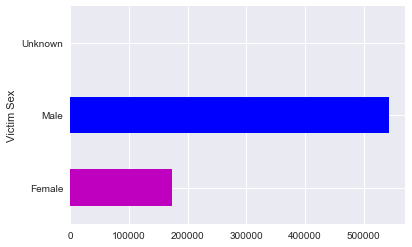

In [31]:
hvsex = hdataset.groupby('Victim Sex')['Victim Count'].sum()
print hvsex
colors = ['m', 'b', 'y']
hvsex.plot(kind = 'barh', color = colors)

Perpetrator Sex
Female      56354
Male       502796
Unknown    196460
Name: Perpetrator Count, dtype: int64


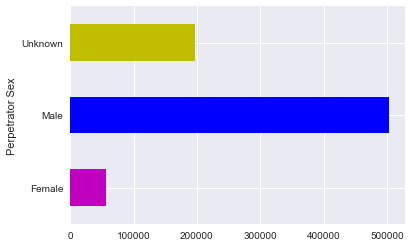

In [32]:
hpsex = hdataset.groupby('Perpetrator Sex')['Perpetrator Count'].sum()
print hpsex
colors = ['m', 'b', 'y']
hpsex.plot(kind = 'barh', color = colors)

Comprobamos que tanto víctimas como sujetos son mayoritariamente hombres.

### Nos preguntamos qué tipo de relación tienen los sujetos con la víctima en función del género.

In [33]:
#Creamos una funcion que simplifica el tipo de relación entre sujeto y víctima a: 
#'Acquaintance', 'Family', 'Love/Friendship', 'Neighbor', 'Stranger', 'Unknown', 'Work-Related'
def relType(s):
    if ((s == 'Wife') or (s == 'Girlfriend') or (s == 'Ex-Husband') or (s == 'Husband') or (s == 'Friend')\
       or (s == 'Ex-Wife') or (s == 'Boyfriend') or (s == 'Common-Law Husband') or (s == 'Common-Law Wife')\
       or (s == 'Boyfriend/Girlfriend')):
        return 'Love/Friendship'
    elif ((s == 'Employer') or (s == 'Employee')):
        return 'Work-Related'
    elif ((s == 'Brother') or (s == 'Stepdaughter') or (s == 'Sister') or (s == 'Family') or (s == 'Father')\
         or (s == 'In-Law') or (s == 'Son') or (s == 'Mother') or (s == 'Stepfather') or (s == 'Stepson')\
         or (s == 'Stepmother') or (s == 'Daughter')):
        return 'Family'
    else:
        return s

In [34]:
#Creamos la nueva columna
hdataset['Relationship Type'] = hdataset['Relationship'].apply(lambda x: relType(x))

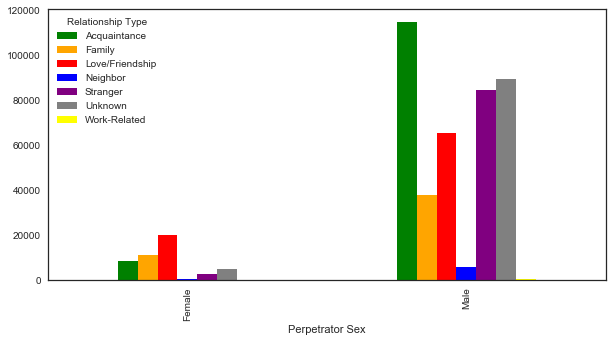

In [35]:
#Visualizamos las frecuencias en funcion del genero
temp = hdataset[hdataset['Perpetrator Sex'] != 'Unknown']
temp1 = pd.crosstab(temp['Perpetrator Sex'], temp['Relationship Type'])
colors = ['green', 'orange', 'red', 'blue', 'purple', 'grey', 'yellow']
with sns.axes_style('white'):
    temp1.plot(kind='bar', stacked=False, figsize = (10,5), color = colors, grid = False)

Las mujeres comenten crímenes contra personas con las que se sienten cercanas emocionalmente (relaciones amorosas, de amistad y pasionales). Lo mismo sucede con los hombres, sin embargo, los hombres cometen muchos más crímenes contra desconocidos, más incluso que contra personas con las que mantienen una relación cercana.

## ESTUDIO DE LOS CRIMINALES

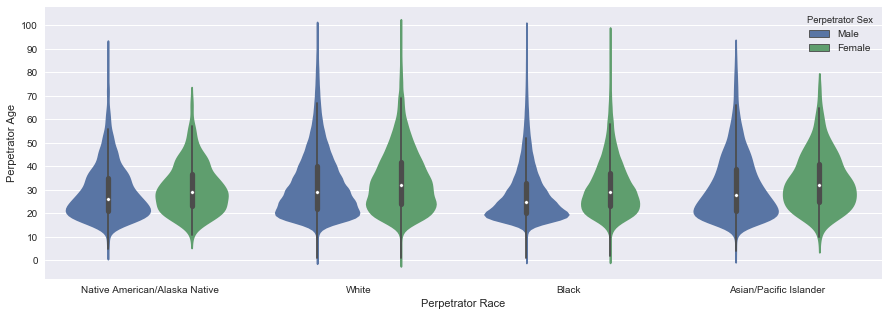

In [36]:
temp = hdataset[hdataset['Perpetrator Race'] != 'Unknown']
temp1 = temp[temp['Perpetrator Sex'] != 'Unknown']
temp1 = temp1[temp1['Perpetrator Age'] != 0]
plt.figure(figsize = (15,5))
ax = sns.violinplot(x="Perpetrator Race", y="Perpetrator Age", hue="Perpetrator Sex", data=temp1)
ax.set_yticks(range(0,110,10))

Vemos que los perfiles son muy parecidos independientemente de la raza. Tanto hombres como mujeres cometen más crímenes entre los 20 y los 40 años, solo que, en el caso de los hombres, parece ser más pronunciado en la veintena, mientras que el que caso de las mujeres, está más balanceado.

## ESTUDIO DE LAS VÍCTIMAS

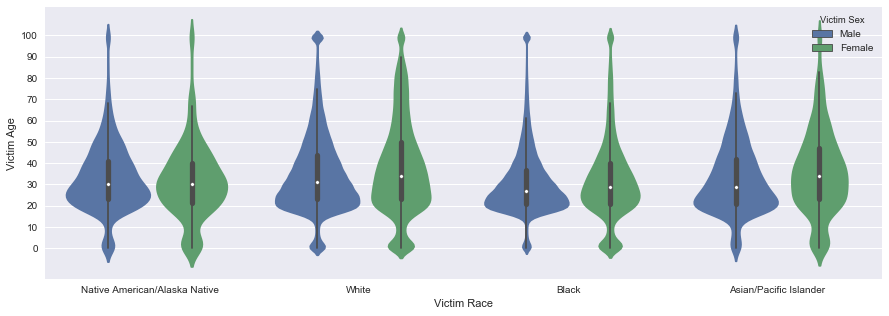

In [37]:
temp = hdataset[hdataset['Victim Race'] != 'Unknown']
temp1 = temp[temp['Victim Sex'] != 'Unknown']
plt.figure(figsize = (15,5))
ax = sns.violinplot(x="Victim Race", y="Victim Age", hue="Victim Sex", data=temp1)
ax.set_yticks(range(0,110,10))

Lo mismo podemos comentar acerca del perfil de las víctimas.

## CRIMENES RESUELTOS VS. NO RESUELTOS

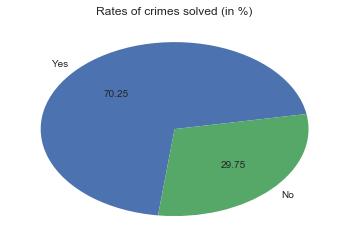

In [38]:
by_resolution = pd.DataFrame(hdataset, columns = ['Crime Solved']) 
res = by_resolution.stack().value_counts()

ax = res.plot(kind = 'pie', title = 'Rates of crimes solved (in %)', startangle = 10, autopct='%.2f')
ax.set_ylabel('')

Veamos el mismo ratio en función de la raza de la víctima.

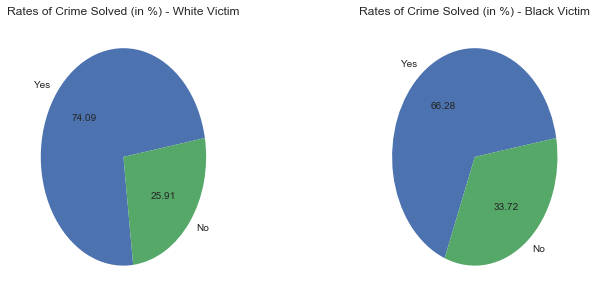

In [39]:
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(121)
hwhite = pd.DataFrame(hdataset[hdataset['Victim Race'] == 'White'], columns = ['Crime Solved']) 
hw_crime_solved = hwhite.stack().value_counts()
hw_crime_solved.plot(kind = 'pie', title = 'Rates of Crime Solved (in %) - White Victim', startangle = 10,\
                    autopct='%.2f', ax = ax1)
ax1.set_ylabel('')

ax2 = fig.add_subplot(122)
hblack = pd.DataFrame(hdataset[hdataset['Victim Race'] == 'Black'], columns = ['Crime Solved']) 
hb_crime_solved = hblack.stack().value_counts()
hb_crime_solved.plot(kind = 'pie', title = 'Rates of Crime Solved (in %) - Black Victim', startangle = 10,\
                       autopct='%.2f', ax = ax2)
ax2.set_ylabel('')

plt.subplots_adjust(wspace = 0.7, hspace = 0.4)

## CORRELACIONES

Eliminamos todas las filas que tengan algún valor 'Unknown'.

In [40]:
hdataset = hdataset[hdataset['Perpetrator Age'] != 0]

In [41]:
(hdataset['Perpetrator Age'] == 0).sum()

0

Seleccionamos solo las columnas que nos interesan para el estudio de correlaciones.

In [42]:
hdataset = pd.DataFrame(hdataset, columns = ['State', 'Year', 'Month', 'Victim Sex', 'Victim Age', 'Victim Race',\
                                            'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
                                             'Relationship', 'Weapon', 'Crime Type'])

In [43]:
cols = ['Victim Sex', 'Victim Race', 'Perpetrator Sex', 'Perpetrator Race', 'Weapon', 'Relationship']
for c in cols:
    hdataset = hdataset[hdataset[c] != 'Unknown']

In [44]:
hdataset.head()

,State,Year,Month,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Crime Type
0,Alaska,1980,January,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,Murder or Manslaughter
1,Alaska,1980,March,Male,43,White,Male,42,White,Acquaintance,Strangulation,Murder or Manslaughter
3,Alaska,1980,April,Male,43,White,Male,42,White,Acquaintance,Strangulation,Murder or Manslaughter
5,Alaska,1980,May,Male,30,White,Male,36,White,Acquaintance,Rifle,Murder or Manslaughter
6,Alaska,1980,May,Female,42,Native American/Alaska Native,Male,27,Black,Wife,Knife,Murder or Manslaughter


Las columnas categóricas han de ser transformadas a numéricas para poder hacer el análisis.

In [45]:
#Funcion para construir un diccionario
def list_par(x,l):
    if x not in l :
        l[x]=len(l)
    return l

In [46]:
# Definicion de los diccionarios para realizar la transformacion
dic_state = {}
for state in hdataset['State']:
    (list_par(state,dic_state))
    
dic_crime_type = {}
for crime_type in hdataset['Crime Type']:
    (list_par(crime_type,dic_crime_type))
    
dic_victim_race = {}
for victim_race in hdataset['Victim Race']:
    (list_par(victim_race,dic_victim_race))
    
dic_perpetrator_race = {}
for perpetrator_race in hdataset['Perpetrator Race']:
    (list_par(perpetrator_race,dic_perpetrator_race))
    
dic_perpetrator_sex = {}
for perpetrator_sex in hdataset['Perpetrator Sex']:
    (list_par(perpetrator_sex,dic_perpetrator_sex))

dic_victim_sex = {}
for victim_sex in hdataset['Victim Sex']:
    (list_par(victim_sex,dic_victim_sex))
    
dic_relationship = {}
for relationship in hdataset['Relationship']:
    (list_par(relationship,dic_relationship))

dic_weapon = {}
for weapon in hdataset['Weapon']:
    (list_par(weapon,dic_weapon))

dic_month = {}
for month in hdataset['Month']:
    (list_par(month,dic_month))
    

In [47]:
#Transformacion de las variables categoricas 

hdataset['Month']=hdataset['Month'].map(dic_month)
hdataset['Victim Sex']=hdataset['Victim Sex'].map(dic_victim_sex)
hdataset['State']=hdataset['State'].map(dic_state)
hdataset['Crime Type']=hdataset['Crime Type'].map(dic_crime_type)
hdataset['Victim Race']=hdataset['Victim Race'].map(dic_victim_race)
hdataset['Perpetrator Race']=hdataset['Perpetrator Race'].map(dic_perpetrator_race)
hdataset['Perpetrator Sex']=hdataset['Perpetrator Sex'].map(dic_perpetrator_sex)
hdataset['Relationship']=hdataset['Relationship'].map(dic_relationship)
hdataset['Weapon']=hdataset['Weapon'].map(dic_weapon)

In [48]:
hdataset.head(10)

,State,Year,Month,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Crime Type
0,0,1980,0,0,14,0,0,15,0,0,0,0
1,0,1980,1,0,43,1,0,42,1,0,1,0
3,0,1980,2,0,43,1,0,42,1,0,1,0
5,0,1980,3,0,30,1,0,36,1,0,2,0
6,0,1980,3,1,42,0,0,27,2,1,3,0
7,0,1980,4,1,99,1,0,35,1,1,3,0
11,0,1980,5,0,20,1,0,49,1,2,4,0
12,0,1980,5,1,36,2,0,39,2,3,0,0
15,0,1980,6,0,31,2,1,29,2,4,5,0
17,0,1980,7,0,33,0,0,23,0,5,0,0


In [49]:
hdataset.corr()

,State,Year,Month,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Crime Type
State,1.000000,0.017196,0.001507,0.007632,0.008258,-0.008982,0.003876,0.003549,-0.003697,-0.029650,0.003377,0.003071
Year,0.017196,1.000000,-0.003896,0.041924,0.014638,-0.030845,-0.051119,0.025923,-0.030871,0.014510,0.047874,0.002066
Month,0.001507,-0.003896,1.000000,-0.000423,0.002315,-0.001809,-0.000688,0.003146,0.000006,-0.004503,-0.004843,-0.000821
Victim Sex,0.007632,0.041924,-0.000423,1.000000,0.068187,-0.090643,-0.056096,0.181749,-0.071012,0.125243,-0.085481,-0.006663
Victim Age,0.008258,0.014638,0.002315,0.068187,1.000000,-0.107578,0.011696,0.366963,-0.077472,-0.042230,-0.057772,-0.095771
Victim Race,-0.008982,-0.030845,-0.001809,-0.090643,-0.107578,1.000000,0.053227,-0.083422,0.748075,-0.057361,0.079468,-0.037785
Perpetrator Sex,0.003876,-0.051119,-0.000688,-0.056096,0.011696,0.053227,1.000000,0.045258,0.033139,0.312466,0.000387,0.011385
Perpetrator Age,0.003549,0.025923,0.003146,0.181749,0.366963,-0.083422,0.045258,1.000000,-0.121464,0.058830,0.020295,-0.069841
Perpetrator Race,-0.003697,-0.030871,0.000006,-0.071012,-0.077472,0.748075,0.033139,-0.121464,1.000000,-0.074081,0.064400,-0.044515
Relationship,-0.029650,0.014510,-0.004503,0.125243,-0.042230,-0.057361,0.312466,0.058830,-0.074081,1.000000,-0.100948,0.059584


Como podemos observar, la correlación es muy pequeña en la mayoria de los casos.